In [1]:
%matplotlib inline
import pandas as pd
import sklearn
import numpy as np
from IPython.display import display
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [5]:
from pythainlp.tokenize import word_tokenize
from pythainlp.corpus import thai_stopwords
import string

frozenset({'ใน',
           'เป็นอัน',
           'แยะ',
           'ตามๆ',
           'แต่เพียง',
           'แต่เมื่อ',
           'อันที่',
           'ตลอดปี',
           'คงจะ',
           'จวบกับ',
           'แค่นี้',
           'ขวางๆ',
           'ในเมื่อ',
           'หรือเปล่า',
           'จวบ',
           'เช่นที่',
           'ที่',
           'ใช้',
           'มากมาย',
           'ต้อง',
           'คุณๆ',
           'พวกคุณ',
           'พวกนี้',
           'จนกระทั่ง',
           'หรือ',
           'การ',
           'นอกจากนั้น',
           'บางคราว',
           'แต่ก่อน',
           'ช้านาน',
           'ดั่ง',
           'ที่แล้ว',
           'นับแต่',
           'เมื่อคราวที่',
           'ดั่งกับ',
           'เมื่อเย็น',
           'ยาวนาน',
           'หมด',
           'ที่ว่า',
           'ได้มา',
           'นับจากนี้',
           'มั้ยนะ',
           'กันและกัน',
           'ที่ใด',
           'ข้าพเจ้า',
           'ตลอดเวลา',
           'ไง',
           'หน

In [6]:
import seaborn as sns
sns.set(style="darkgrid")

In [7]:
plt.rcParams['font.family']='TH SarabunPSK' #you can change to other font that works for you
plt.rcParams.update({'font.size': 50})
#fill your code here

In [8]:
input_pbs = pd.read_csv('../data/the_standard_data.csv')

In [9]:
input_pbs.drop('Unnamed: 0', axis=1, inplace=True)

KeyError: "['Unnamed: 0'] not found in axis"

In [10]:
input_pbs.head()

,headline,date,time,view,like,share,comment,category,tag,content,DOW
0,สุดารัตน์การันตี มิ่งขวัญไม่เสียสัจจะ เชื่อประ...,13/04/2562,NaN,368,NaN,NaN,NaN,"Thailand,Politics","พรรคเพื่อไทย,สุดารัตน์ เกยุราพันธุ์,มิ่งขวัญ แ...",หลังเกิดกระแสข่าวลือว่าพรรคเศรษฐกิจใหม่ที่นำโด...,SAT
1,สโมสรฟุตบอลซาน ลอเรนโซฯ ในอาร์เจนตินา ประกาศเซ...,13/04/2562,NaN,22,NaN,NaN,NaN,Sport,"Argentina,San Lorenzo de Almagro",เมื่อช่วงบ่ายของวันศุกร์ที่ 12 เมษายนที่ผ่านมา...,SAT
2,ภาพข่าวยอดเยี่ยมประจำวันที่ 7-13 เมษายน 2562,13/04/2562,NaN,31,NaN,NaN,NaN,"World,Thailand",ภาพข่าวยอดเยี่ยม,จากเหตุเพลิงไหม้บริเวณศูนย์การค้าเซ็นทรัลเวิลด...,SAT
3,สงกรานต์สีลม สีสันความสนุก กิจกรรมดับร้อนของคน...,13/04/2562,NaN,280,NaN,NaN,NaN,Thailand,เทศกาลสงกรานต์,แม้ก่อนเริ่มต้นเทศกาลสงกรานต์ 2562 จะเกิดความส...,SAT
4,14 April 2003 – โครงการศึกษาจีโนมของมนุษย์เสร็...,14/04/2562,NaN,56,NaN,NaN,NaN,On this day,"พันธุกรรม,วิทยาศาสตร์",จีโนมมนุษย์ (Genome) ถูกค้นพบเมื่อราว 50 ปีก่อ...,SUN


In [16]:
num = [str(i) for i in range(1000)]
stop_words = list(thai_stopwords())
stop_words+=[' ','']
stop_words+=string.punctuation

In [17]:
def getToken(text):
#     print(text)
    res = word_tokenize(text,engine='deepcut')
    res = [i for i in res if i not in en_stop and i not in num and i.strip() not in stop_words]
    return res

In [18]:
input_pbs['token'] = input_pbs['headline'].apply(getToken)

ModuleNotFoundError: No module named 'deepcut'

In [47]:
input_pbs.head()

,Unnamed: 0,headline,date,DOW,time,view,category,tag,hour,numTag,token,numToken
0,0,ฝุ่น PM2.5 : ทส.เตรียมตั้งศูนย์แก้ปัญหาหมอกควั...,05/04/2562,FRI,19:37,177,สิ่งแวดล้อม,"ฝุ่นเชียงใหม่,ฝุ่นPM2.5,ฝุ่นคลุมเมือง,เชียงใหม...",19,10,"ฝุ่น,PM,ทส.,เตรียม,ศูนย์,แก้,ปัญหา,หมอก,ควัน,ข...",11
1,1,"เลือกตั้ง 2562 : ""เพื่อไทย"" เตรียมยื่น กกต.จัด...",05/04/2562,FRI,19:20,702,การเมือง,"เลือกตั้ง62,เพื่อ่ไทย,กกต.,นับคะแนน,ไทยพีบีเอส...",19,6,"เลือกตั้ง,2562,ไทย,เตรียม,ยื่น,กกต.,เลือกตั้ง,...",9
2,2,เตรียมเอาผิด รพ.เอกชน 58 แห่งไม่ส่งข้อมูลราคายา,05/04/2562,FRI,19:18,583,สาธารณสุข,"ยา,เวชภัณฑ์ฯ,โรงพยาบาล,ค่าบริการทางการแพทย์,กร...",19,9,"เตรียม,รพ.เอกชน,ข้อมูล,ราคา,ยา",5
3,3,ตั้งข้อสังเกตปลดล็อกกัญชา เอื้อนายทุนหรือไม่?,05/04/2562,FRI,19:16,928,อาชญากรรม,"กัญชา,มูลนิธิข้าวขวัญ,ThaiPBSnews",19,3,"ข้อ,สังเกต,ปลด,ล็อก,กัญชา,เอื้อ,ทุน",7
4,4,"คำพิพากษาเต็ม ""เปรมชัย"" หลุดคดีครอบครองซากเสือดำ",05/04/2562,FRI,19:29,5163,สิ่งแวดล้อม,"เสือดำ,เปรมชัย,เขตรักษาพันธุ์สัตว์ป่าทุ่งใหญ่น...",19,5,"พิพากษา,เต็ม,เปรมชัย,หลุดคดี,ครอบครอง,ซาก,เสือดำ",7


In [45]:
input_pbs['token'] = input_pbs['token'].apply(lambda x : x[1:-1].replace("'","").replace(' ',''))

In [111]:
# input_pbs['numToken'] = input_pbs['token'].apply(lambda x:len(x))

In [11]:
# input_pbs.to_csv('Thaipbs-tokenize.csv')

In [6]:
input_pbs = pd.read_csv('Thaipbs-tokenize.csv')

In [7]:
input_pbs.drop('Unnamed: 0', axis=1, inplace=True)

In [8]:
input_pbs['numToken'] = input_pbs['token'].apply(lambda x : len(x.split(',')))

In [9]:
input_pbs['numChar'] = input_pbs['token'].apply(lambda x: len(x.replace(',','')))

In [21]:
input_pbs.iloc[2]['token'].replace(',','')

'เตรียมรพ.เอกชนข้อมูลราคายา'

In [10]:
input_pbs.head()

,headline,date,DOW,time,view,category,tag,hour,numTag,token,numToken,numChar
0,ฝุ่น PM2.5 : ทส.เตรียมตั้งศูนย์แก้ปัญหาหมอกควั...,05/04/2562,FRI,19:37,177,สิ่งแวดล้อม,"ฝุ่นเชียงใหม่,ฝุ่นPM2.5,ฝุ่นคลุมเมือง,เชียงใหม...",19,10,"ฝุ่น,PM,ทส.,เตรียม,ศูนย์,แก้,ปัญหา,หมอก,ควัน,ข...",11,43
1,"เลือกตั้ง 2562 : ""เพื่อไทย"" เตรียมยื่น กกต.จัด...",05/04/2562,FRI,19:20,702,การเมือง,"เลือกตั้ง62,เพื่อ่ไทย,กกต.,นับคะแนน,ไทยพีบีเอส...",19,6,"เลือกตั้ง,2562,ไทย,เตรียม,ยื่น,กกต.,เลือกตั้ง,...",9,46
2,เตรียมเอาผิด รพ.เอกชน 58 แห่งไม่ส่งข้อมูลราคายา,05/04/2562,FRI,19:18,583,สาธารณสุข,"ยา,เวชภัณฑ์ฯ,โรงพยาบาล,ค่าบริการทางการแพทย์,กร...",19,9,"เตรียม,รพ.เอกชน,ข้อมูล,ราคา,ยา",5,26
3,ตั้งข้อสังเกตปลดล็อกกัญชา เอื้อนายทุนหรือไม่?,05/04/2562,FRI,19:16,928,อาชญากรรม,"กัญชา,มูลนิธิข้าวขวัญ,ThaiPBSnews",19,3,"ข้อ,สังเกต,ปลด,ล็อก,กัญชา,เอื้อ,ทุน",7,29
4,"คำพิพากษาเต็ม ""เปรมชัย"" หลุดคดีครอบครองซากเสือดำ",05/04/2562,FRI,19:29,5163,สิ่งแวดล้อม,"เสือดำ,เปรมชัย,เขตรักษาพันธุ์สัตว์ป่าทุ่งใหญ่น...",19,5,"พิพากษา,เต็ม,เปรมชัย,หลุดคดี,ครอบครอง,ซาก,เสือดำ",7,42


/home/burin/.env/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


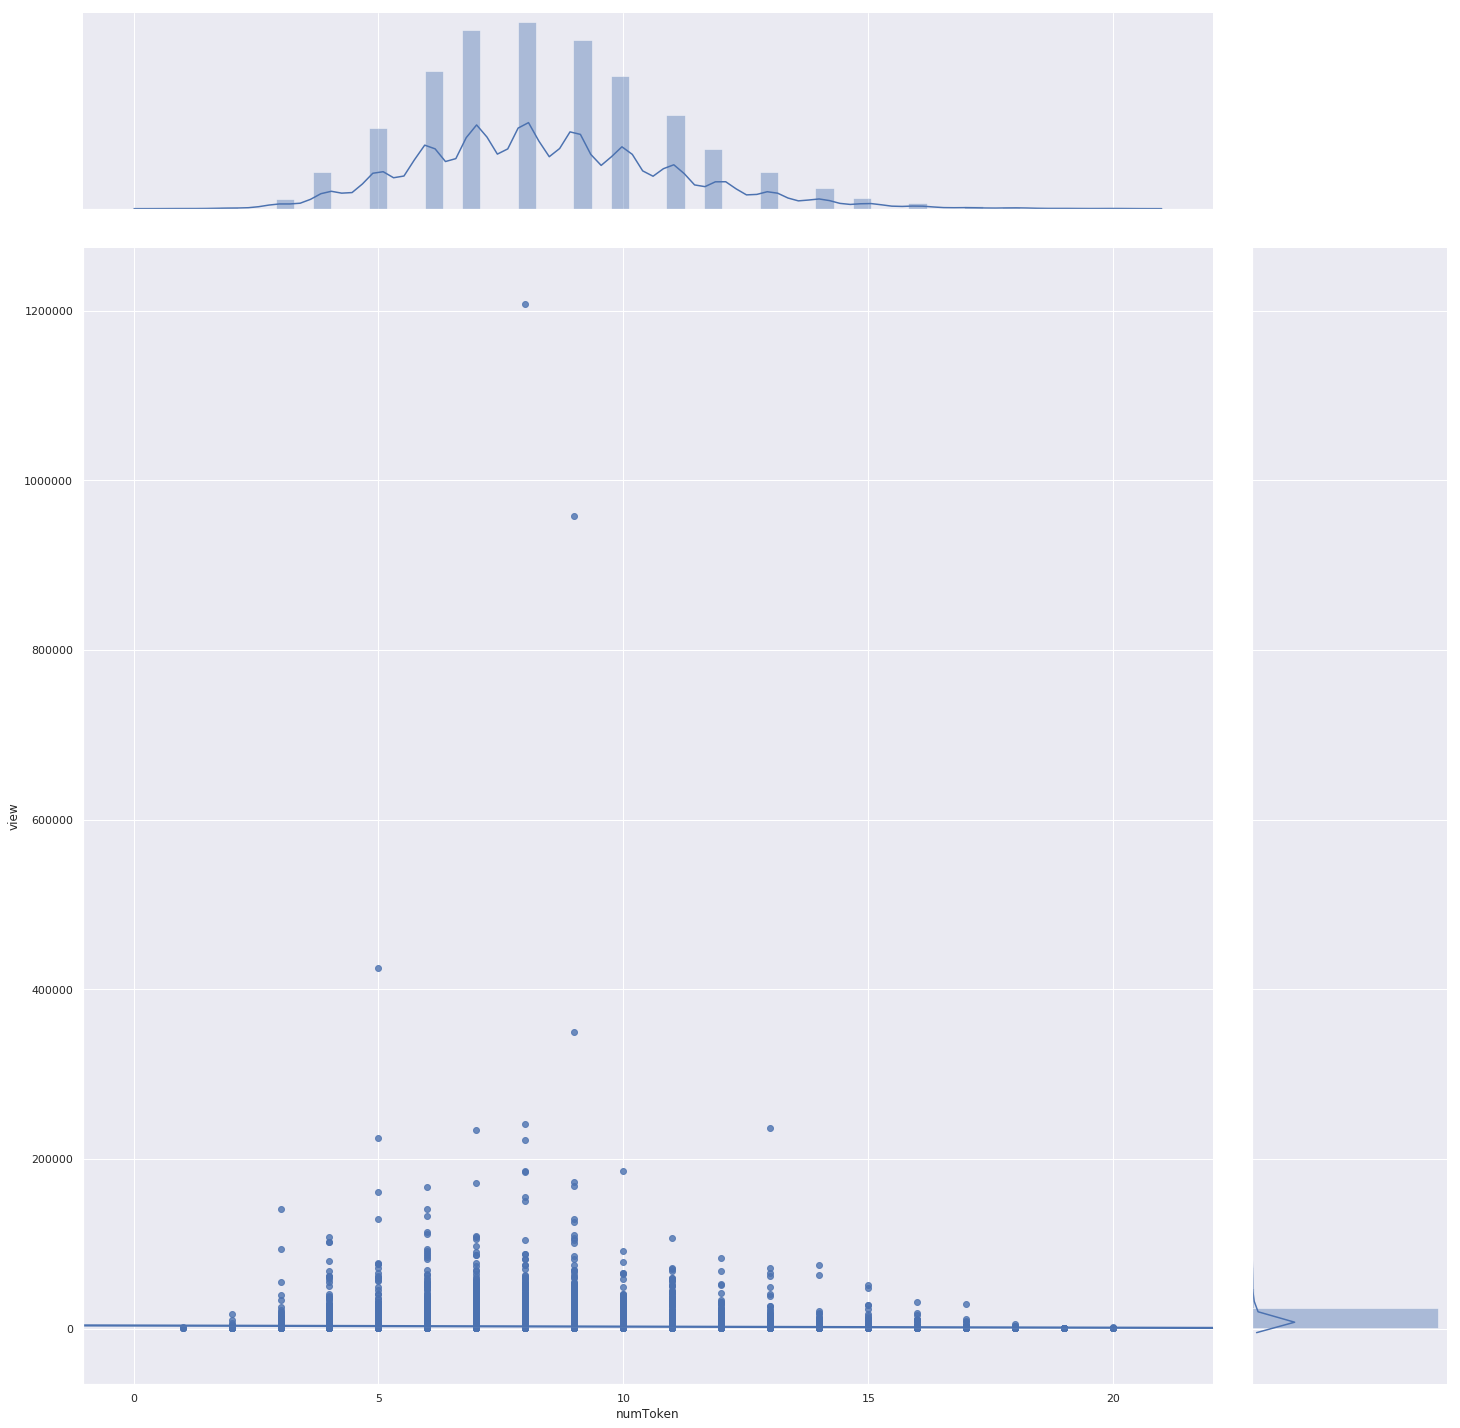

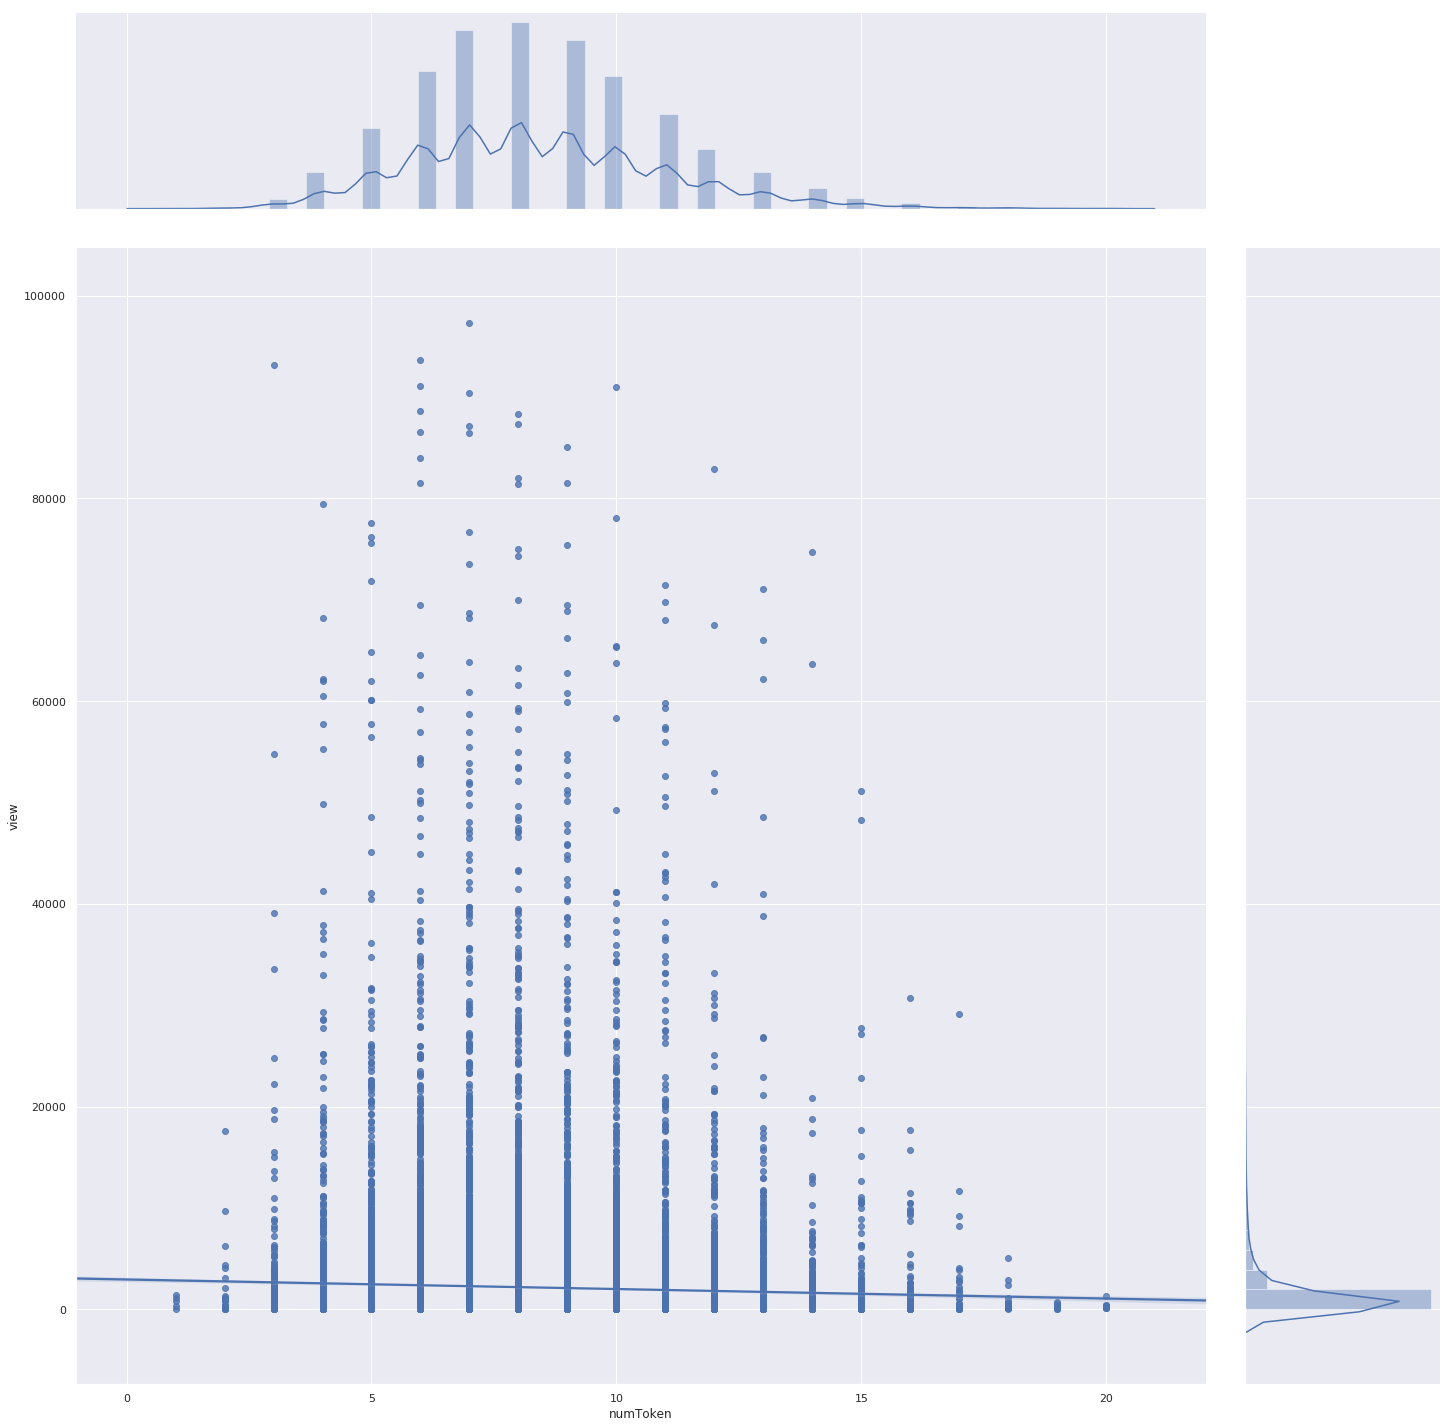

In [19]:
sns.jointplot("numToken", "view", data=input_pbs, kind="reg",height=20 )
sns.jointplot("numToken", "view", data=input_pbs[input_pbs['view']<100000], kind="reg",height=20 )

In [23]:
IQRval = input_pbs['view'].describe().loc['75%']-input_pbs['view'].describe().loc['25%']

In [24]:
outlierMin = max(input_pbs['view'].describe().loc['25%']-1.5*IQRval,0)
outlierMax = input_pbs['view'].describe().loc['75%']+1.5*IQRval
print(outlierMin,outlierMax)

0 3499.5


In [25]:
input_pbs_cut = input_pbs[(input_pbs['view']<=outlierMax) & (input_pbs['view']>=outlierMin)]

In [26]:
input_pbs_cut['numToken'].describe()

count    24511.000000
mean        11.407776
std          3.598921
min          1.000000
25%          9.000000
50%         11.000000
75%         14.000000
max         30.000000
Name: numToken, dtype: float64

In [27]:
input_pbs_cut['numChar'].describe()

count    24511.000000
mean        42.075762
std         11.296444
min          4.000000
25%         34.000000
50%         41.000000
75%         49.000000
max         94.000000
Name: numChar, dtype: float64

In [28]:
input_pbs_cut['view'].describe()

count    24511.000000
mean       755.928603
std        754.956352
min         20.000000
25%        228.000000
50%        454.000000
75%       1006.000000
max       3496.000000
Name: view, dtype: float64

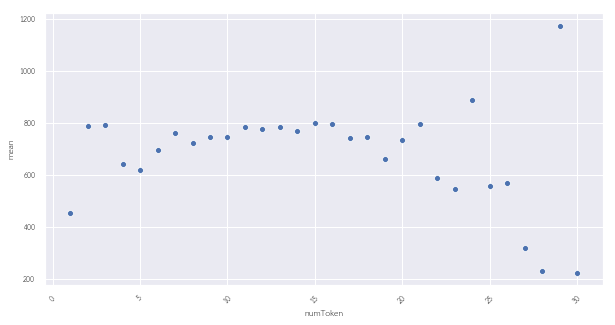

In [29]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
sns.scatterplot(x="numToken", y="mean", data=pd.DataFrame(input_pbs_cut.groupby(['numToken'])['view'].describe()).reset_index())

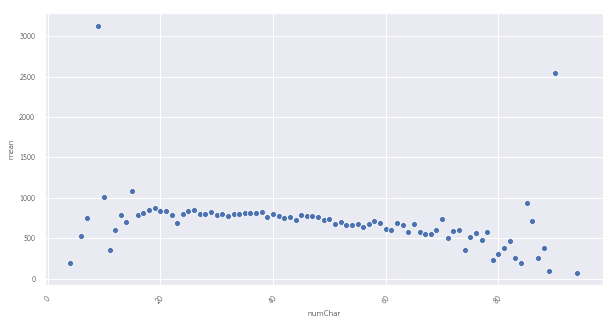

In [30]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
sns.scatterplot(x="numChar", y="mean", data=pd.DataFrame(
    input_pbs_cut.groupby(['numChar'])['view'].describe()).reset_index())



## Include stop words

In [50]:
input_pbs = pd.read_csv('notebook1-result-thaipbs.csv')

In [51]:
input_pbs.drop('Unnamed: 0', axis=1, inplace=True)

In [56]:
from stop_words import get_stop_words
num = [str(i) for i in range(1000)]
stop_words =[' ','']
stop_words+=string.punctuation

In [57]:
def getToken(text):
#     print(text)
    res = word_tokenize(text,engine='deepcut')
    res = [i for i in res if i not in num and i.strip() not in stop_words]
    return res

In [58]:
input_pbs['token'] = input_pbs['headline'].apply(getToken)

In [62]:
input_pbs['token'] = input_pbs['token'].apply(lambda x : x[1:-1].replace("'","").replace(' ',''))

In [66]:
# input_pbs.to_csv('Thaipbs-tokenize_include_stop.csv')

In [61]:
input_pbs = pd.read_csv('Thaipbs-tokenize_include_stop.csv')

In [63]:
input_pbs['numToken'] = input_pbs['token'].apply(lambda x : len(x.split(',')))

In [64]:
input_pbs['numChar'] = input_pbs['token'].apply(lambda x: len(x.replace(',','')))

In [65]:
input_pbs.head()

,Unnamed: 0,headline,date,DOW,time,view,category,tag,hour,numTag,token,numToken,numChar
0,0,ฝุ่น PM2.5 : ทส.เตรียมตั้งศูนย์แก้ปัญหาหมอกควั...,05/04/2562,FRI,19:37,177,สิ่งแวดล้อม,"ฝุ่นเชียงใหม่,ฝุ่นPM2.5,ฝุ่นคลุมเมือง,เชียงใหม...",19,10,"ฝุ่น,PM,ทส.,เตรียม,ตั้ง,ศูนย์,แก้,ปัญหา,หมอก,ค...",12,47
1,1,"เลือกตั้ง 2562 : ""เพื่อไทย"" เตรียมยื่น กกต.จัด...",05/04/2562,FRI,19:20,702,การเมือง,"เลือกตั้ง62,เพื่อ่ไทย,กกต.,นับคะแนน,ไทยพีบีเอส...",19,6,"เลือกตั้ง,2562,เพื่อ,ไทย,เตรียม,ยื่น,กกต.,จัด,...",12,58
2,2,เตรียมเอาผิด รพ.เอกชน 58 แห่งไม่ส่งข้อมูลราคายา,05/04/2562,FRI,19:18,583,สาธารณสุข,"ยา,เวชภัณฑ์ฯ,โรงพยาบาล,ค่าบริการทางการแพทย์,กร...",19,9,"เตรียม,เอา,ผิด,รพ.เอกชน,แห่ง,ไม่,ส่ง,ข้อมูล,รา...",10,42
3,3,ตั้งข้อสังเกตปลดล็อกกัญชา เอื้อนายทุนหรือไม่?,05/04/2562,FRI,19:16,928,อาชญากรรม,"กัญชา,มูลนิธิข้าวขวัญ,ThaiPBSnews",19,3,"ตั้ง,ข้อ,สังเกต,ปลด,ล็อก,กัญชา,เอื้อ,นาย,ทุน,ห...",11,43
4,4,"คำพิพากษาเต็ม ""เปรมชัย"" หลุดคดีครอบครองซากเสือดำ",05/04/2562,FRI,19:29,5163,สิ่งแวดล้อม,"เสือดำ,เปรมชัย,เขตรักษาพันธุ์สัตว์ป่าทุ่งใหญ่น...",19,5,"คำ,พิพากษา,เต็ม,เปรมชัย,หลุดคดี,ครอบครอง,ซาก,เ...",8,44


In [124]:
IQRval = input_pbs['view'].describe().loc['75%']-input_pbs['view'].describe().loc['25%']

In [125]:
outlierMin = max(input_pbs['view'].describe().loc['25%']-1.5*IQRval,0)
outlierMax = input_pbs['view'].describe().loc['75%']+1.5*IQRval
print(outlierMin,outlierMax)

0 3499.5


In [149]:
input_pbs_cut = input_pbs[(input_pbs['view']<=outlierMax) & (input_pbs['view']>=outlierMin)]

In [150]:
input_pbs_cut['numToken'].describe()

count    24511.000000
mean        11.390927
std          3.354592
min          1.000000
25%          9.000000
50%         11.000000
75%         13.000000
max         28.000000
Name: numToken, dtype: float64

In [151]:
input_pbs_cut['numChar'].describe()

count    24511.000000
mean        51.657868
std         12.869012
min          4.000000
25%         43.000000
50%         50.000000
75%         60.000000
max        111.000000
Name: numChar, dtype: float64

In [152]:
input_pbs_cut['view'].describe()

count    24511.000000
mean       755.928603
std        754.956352
min         20.000000
25%        228.000000
50%        454.000000
75%       1006.000000
max       3496.000000
Name: view, dtype: float64

/home/burin/.env/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


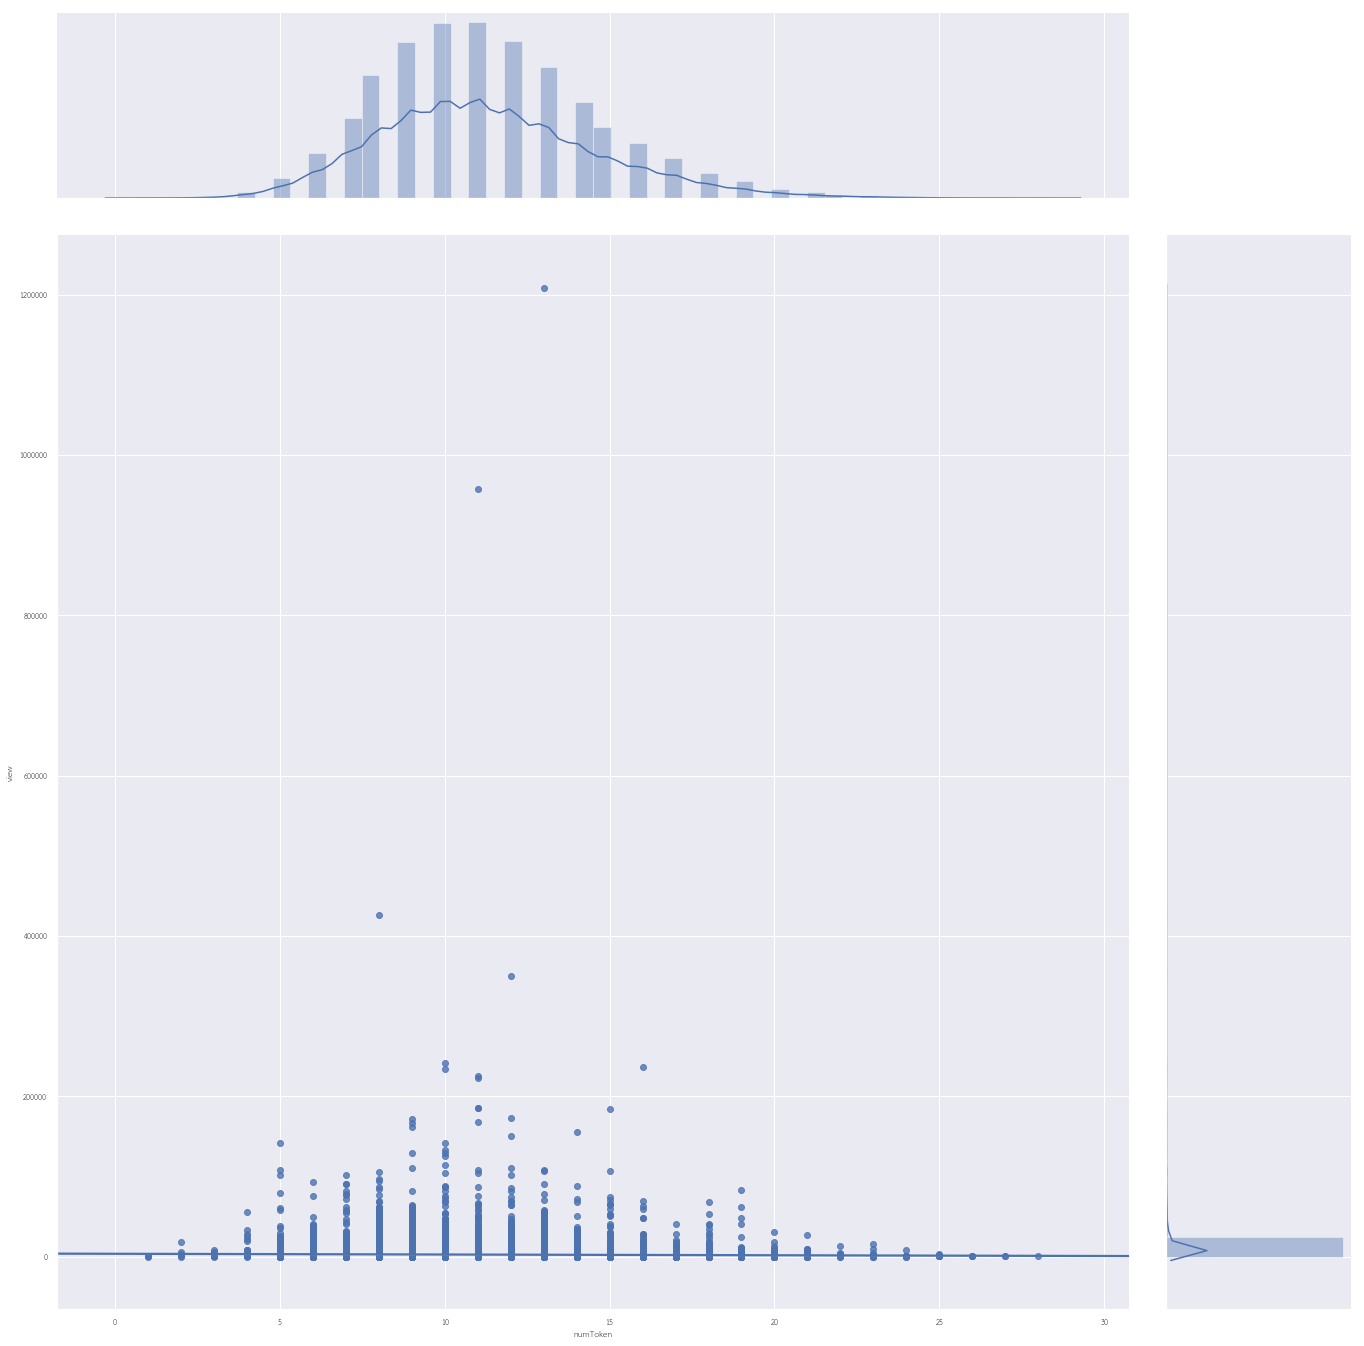

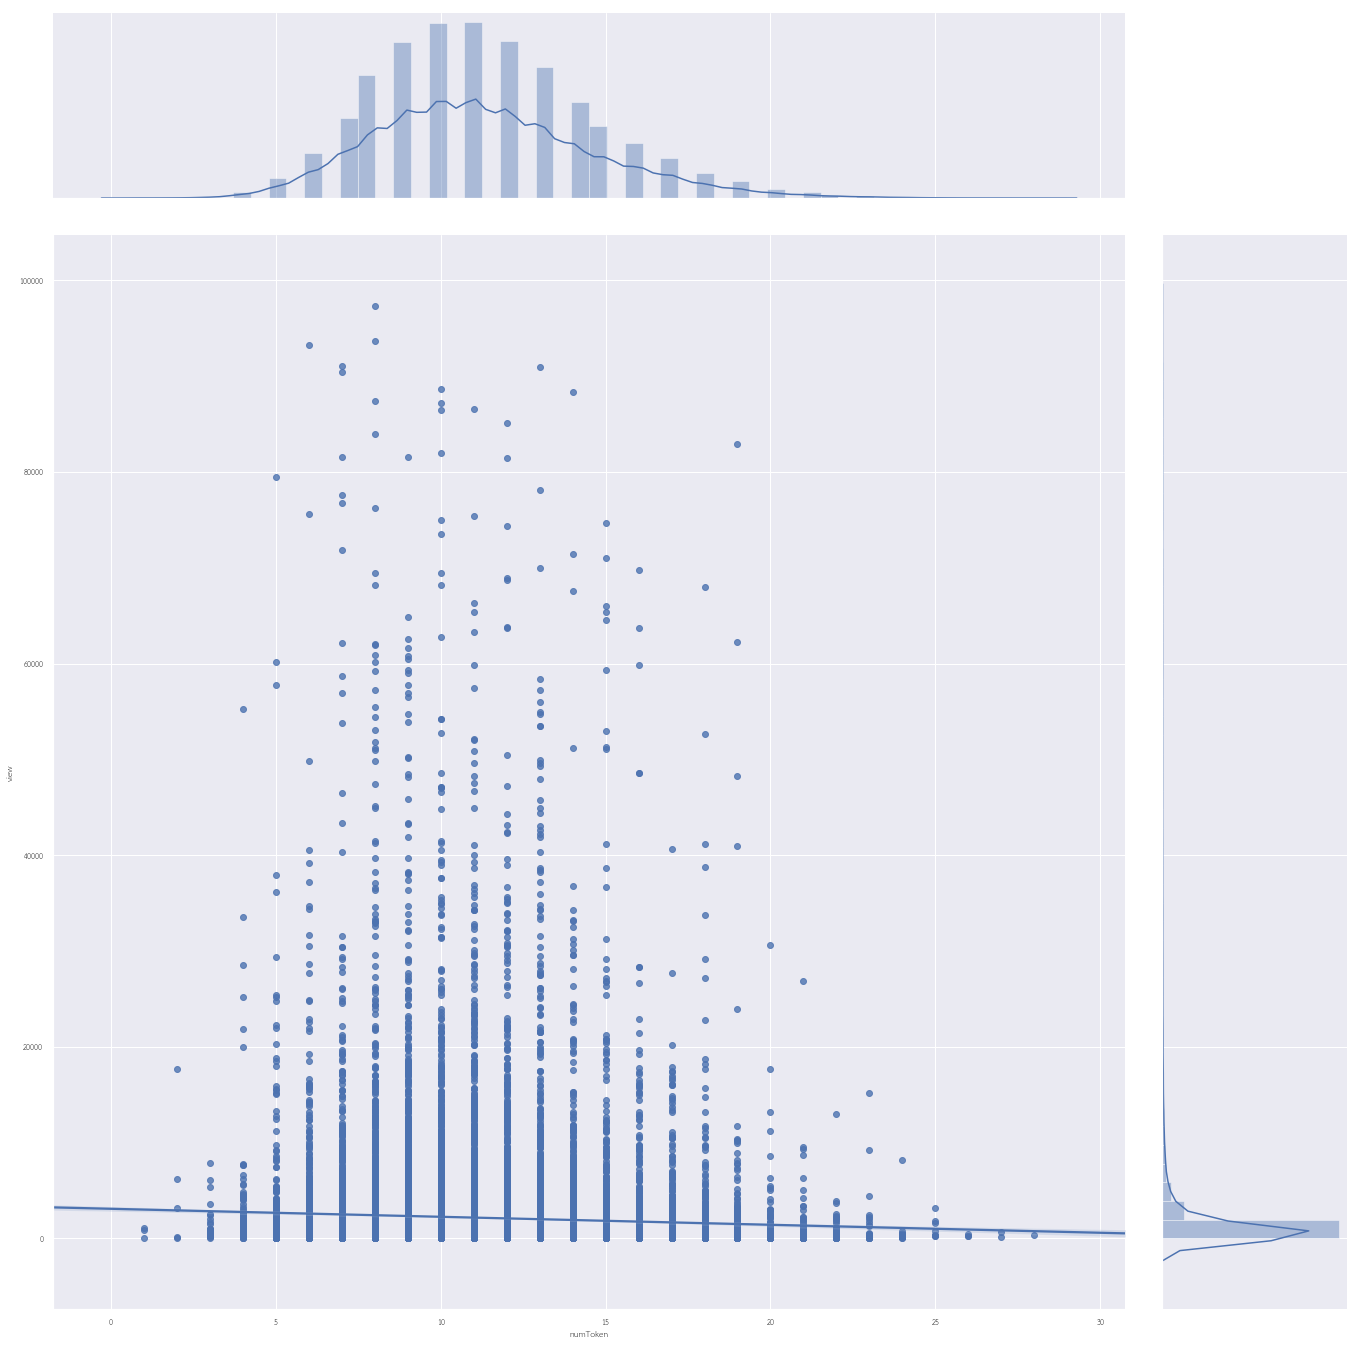

In [98]:
sns.jointplot("numToken", "view", data=input_pbs, kind="reg",height=20 )
sns.jointplot("numToken", "view", data=input_pbs[input_pbs['view']<100000], kind="reg",height=20 )

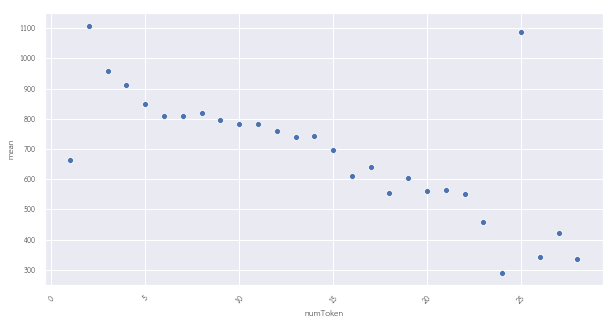

In [14]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
sns.scatterplot(x="numToken", y="mean", data=pd.DataFrame(input_pbs_cut.groupby(['numToken'])['view'].describe()).reset_index())

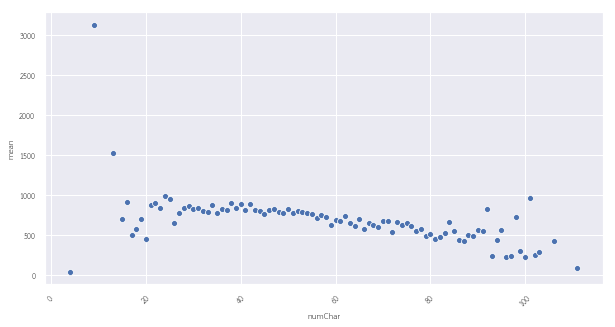

In [153]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
sns.scatterplot(x="numChar", y="mean", data=pd.DataFrame(input_pbs_cut.groupby(['numChar'])['view'].describe()).reset_index())